# FILTRAR EEG USANDO WAVELET

## EEG EN REPOSO

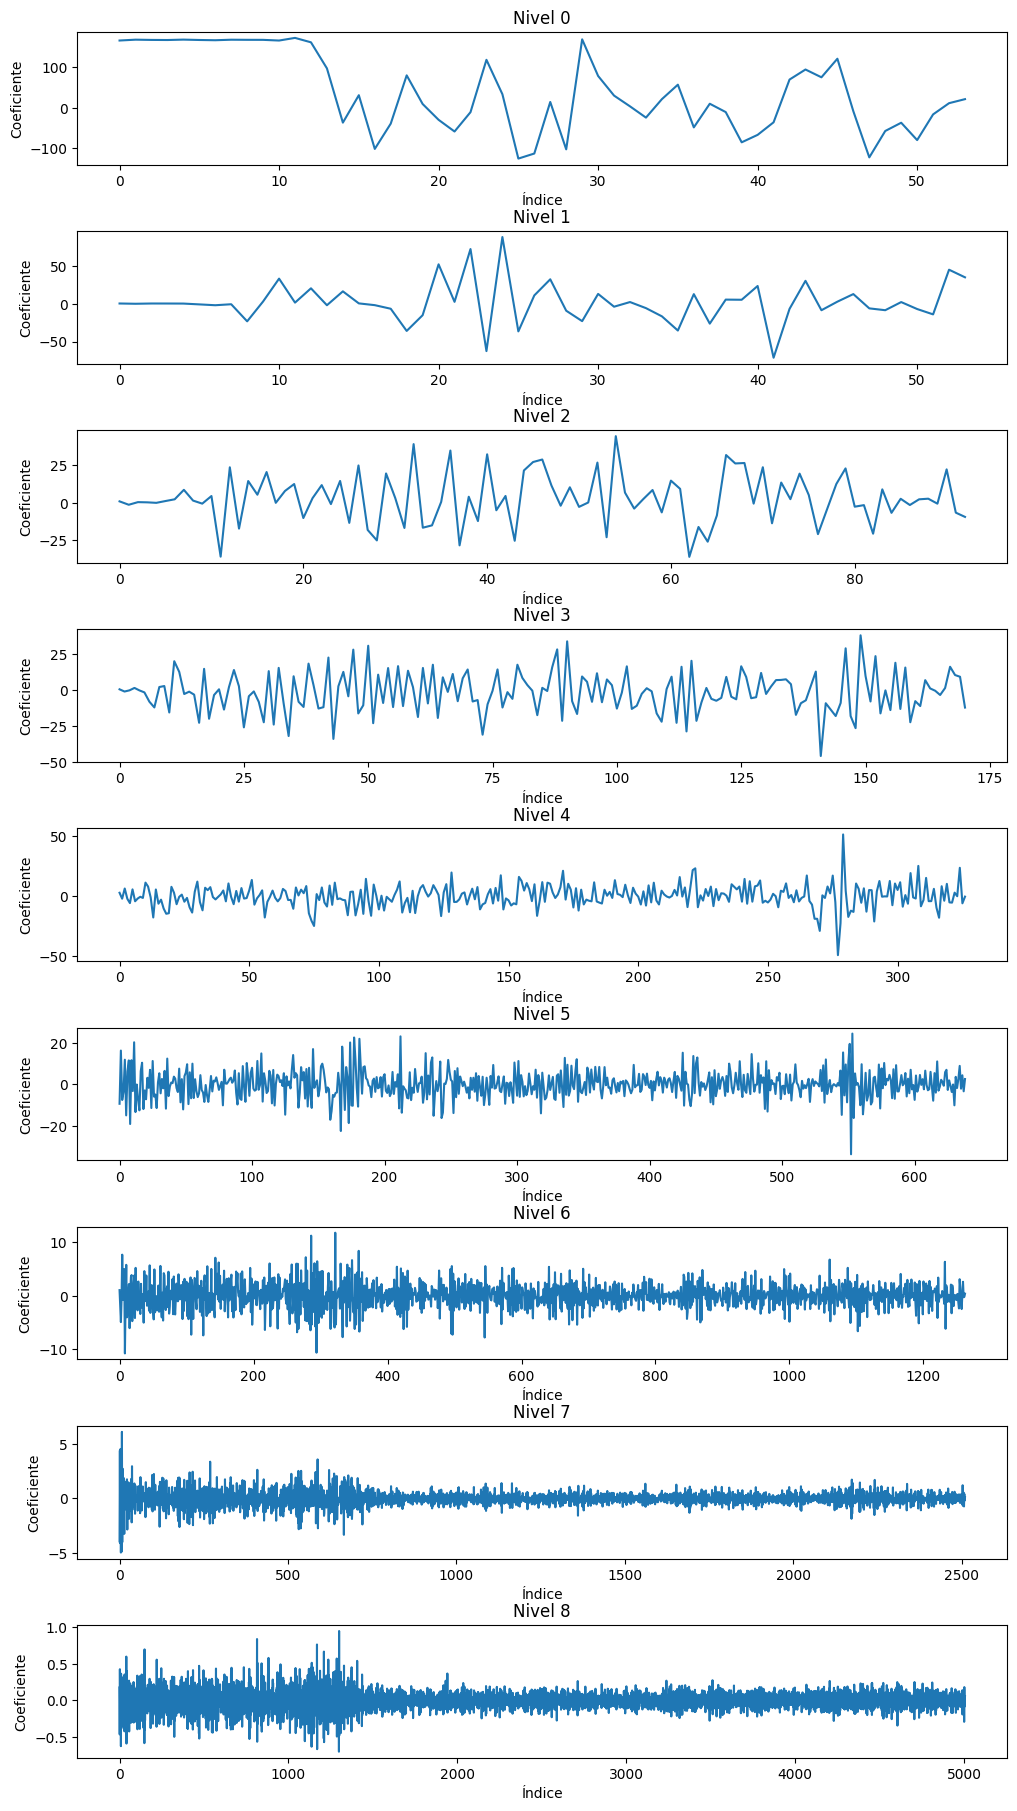

In [14]:
#Ploteo y Filtrado de señales EEG obtenidas con el Bitalino
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import firwin, lfilter
from tqdm import tqdm
from scipy import signal
import pywt

#Antes de realizar el ploteo correspondiente, es necesario tener las siguientes consideraciones:

#La frecuencia de muestreo del bitalino es de 1000 Hz.
#Asimismo, la funcion de tranferencia utilizada para obtener la gráfica fue:
# (((ADC/1024)-0.5)*3.3)/41782

#-------PLOTEO DE LA SEÑAL 1
array= np.genfromtxt("/content/Reposo-EEG.txt",delimiter="	",skip_header = 2) #leemos el archivo txt

M = array[:,-2].shape[0] #longitud de la señal
valores=array[:,-2]

cantidad=np.size(valores);
#Siendo la frecuencia de muestreo del BITalino de 1000 Hz

tiempo=np.arange(0,cantidad)
tiempo=tiempo/1000

valores=(((valores/1024)-0.5)*3.3)/(41782)
valores=valores*1000000
#Seleccionamos solo 10 segundos de la señal para analizarla, debido a que la muestra de ojos cerrados debería ser la misma durante
#toda la toma de la señal.
# recordamos que f_muestro = 1000 Hz, por lo que en 1 segundo, tenemos 1000 muestras.
valores=valores[0:10000]
tiempo=tiempo[0:10000]


# HACEMOS EL FILTRADO CON WAVELET
fs = 1000  # Frecuencia de muestreo
t = tiempo
eeg_signal = valores

# Aplicar la transformada wavelet discreta (DWT) a la señal EEG
coeffs = pywt.wavedec(eeg_signal, 'db8', level=8)

# Visualizar todos los niveles de la wavelet
plt.figure(figsize=(12, 25))
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs) + 1, 1, i + 1)
    plt.plot(coeff)
    plt.title(f'Nivel {i}')
    plt.xlabel('Índice')
    plt.ylabel('Coeficiente')

plt.subplots_adjust(hspace=0.5)

# Filtrar los coeficientes eliminando los detalles no deseados
for i in range(1, 3):  # Eliminar los detalles en los niveles D1 y D2
    coeffs[i] *= 0

# Eliminar la madre wavelet A8 correspondiente al rango de frecuencia de 0 a 0.5 Hz
coeffs[8] *= 0

# Reconstruir la señal filtrada
filtered_signal = pywt.waverec(coeffs, 'db8')

plt.show()

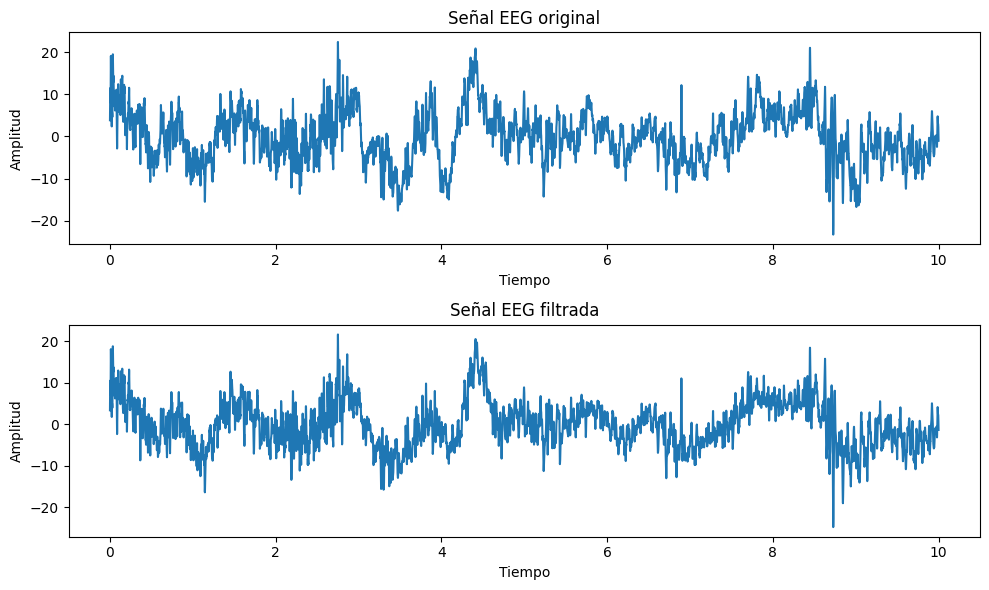

In [16]:
# Visualizar la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, eeg_signal)
plt.title('Señal EEG original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Señal EEG filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

## EEG REPOSO FFT

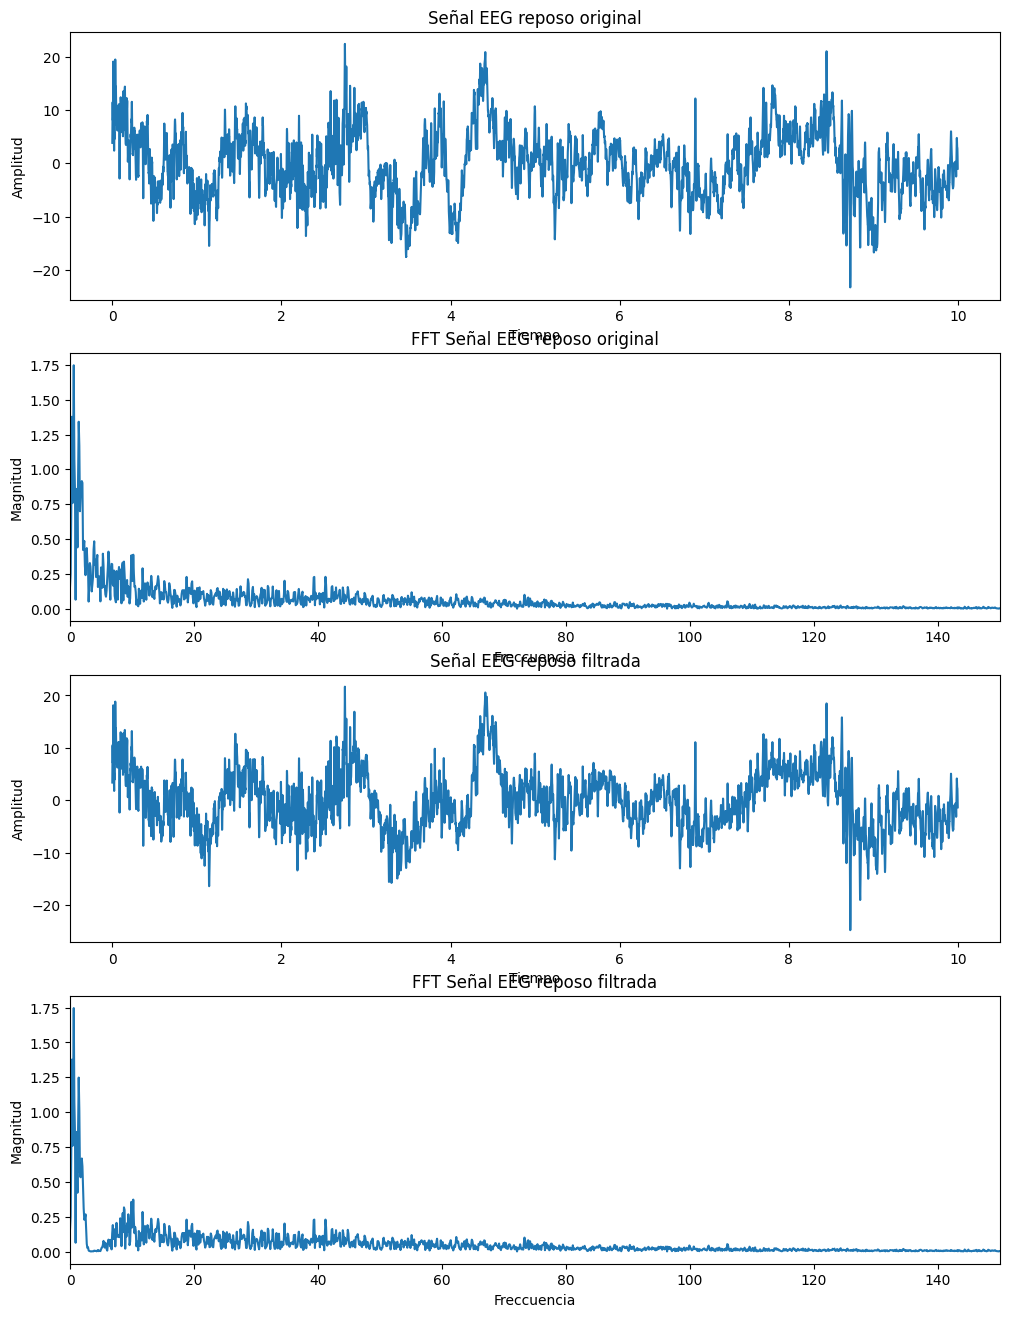

In [22]:
plt.figure(figsize=(12, 16))
plt.subplot(4, 1, 1)
plt.plot(t, eeg_signal)
plt.title('Señal EEG reposo original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 2)
plt.magnitude_spectrum(eeg_signal, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal EEG reposo original')
plt.xlabel('Freccuencia')
plt.ylabel('Magnitud')

plt.subplot(4, 1, 3)
plt.plot(t, filtered_signal)
plt.title('Señal EEG reposo filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 4)
plt.magnitude_spectrum(filtered_signal, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal EEG reposo filtrada')
plt.xlabel('Freccuencia')
plt.ylabel('Magnitud')
plt.show()

## EEG CICLO DE ABRIR Y CERRAR OJOS

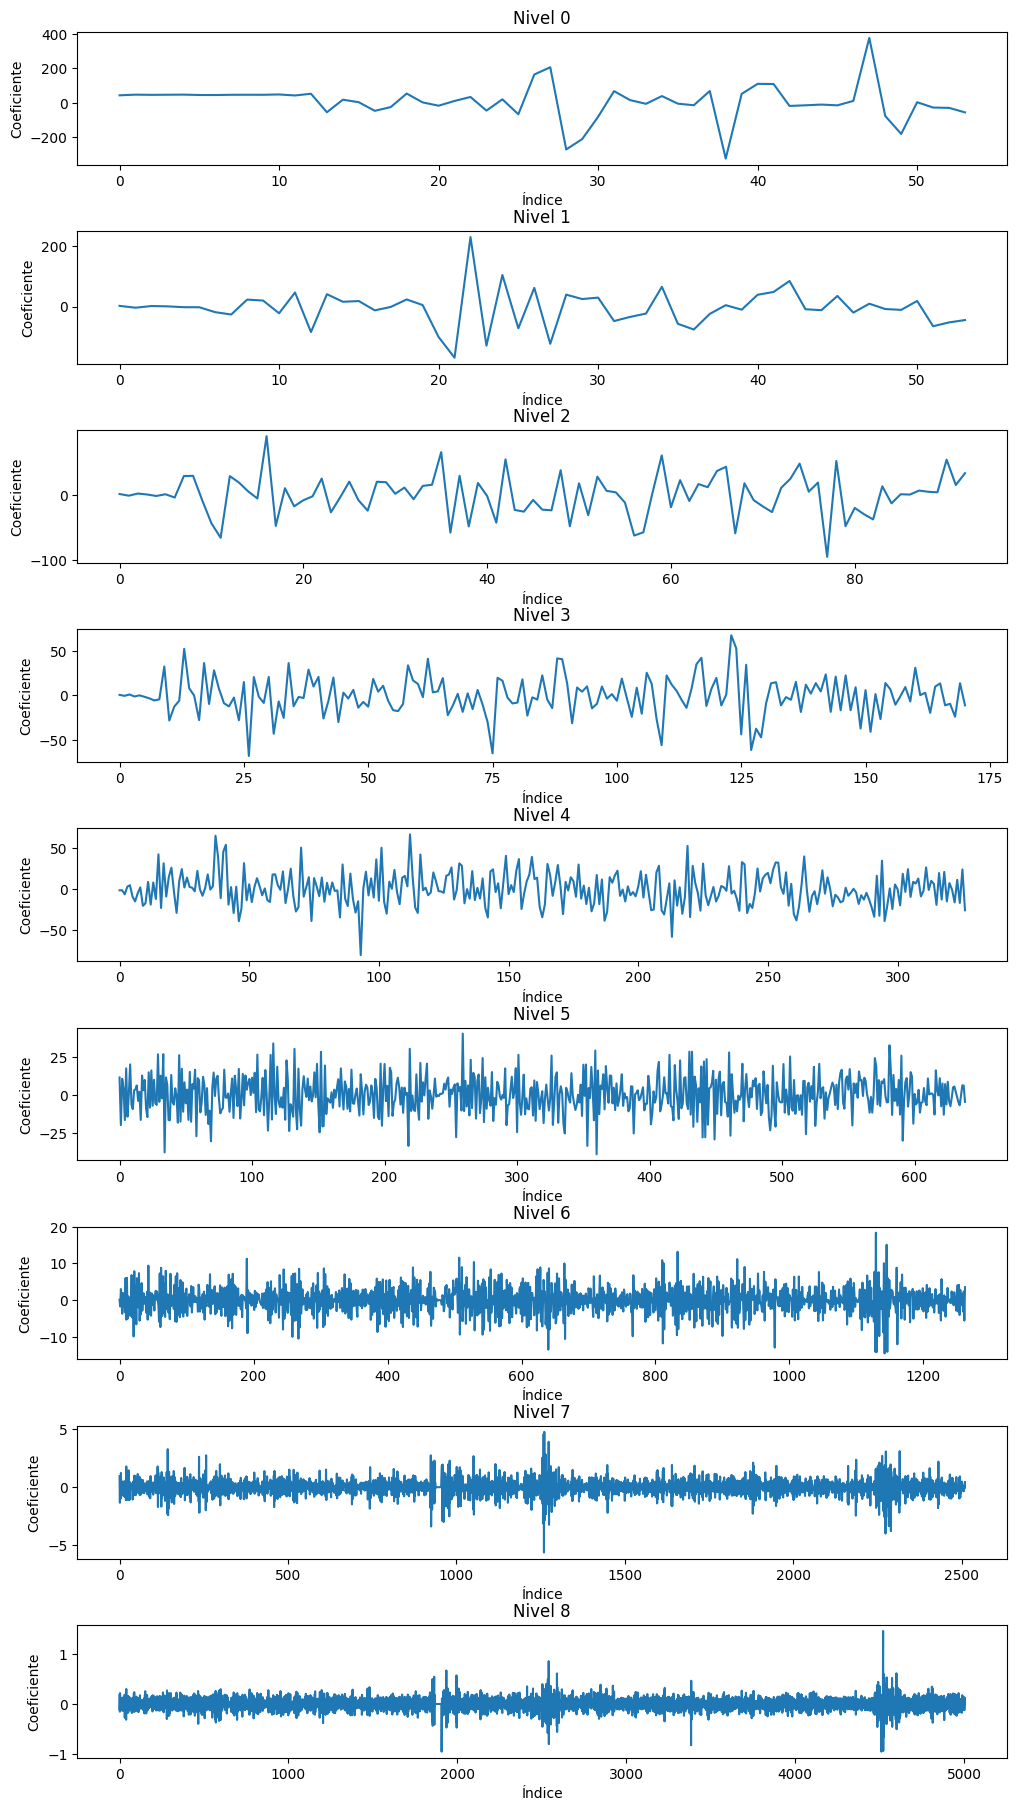

In [19]:
#-------PLOTEO DE LA SEÑAL 2
array = np.genfromtxt("/content/2 EEG.txt",delimiter="	",skip_header = 2) #leemos el archivo txt

M = array[:,-2].shape[0] #longitud de la señal
valores=array[:,-2]

cantidad=np.size(valores);
#Siendo la frecuencia de muestreo del BITalino de 1000 Hz

tiempo=np.arange(0,cantidad)
tiempo=tiempo/1000

valores=(((valores/1024)-0.5)*3.3)/(41782)
valores=valores*1000000

valores=valores[0:10000]
tiempo=tiempo[0:10000]

# HACEMOS EL FILTRADO CON WAVELET
fs = 1000  # Frecuencia de muestreo
t = tiempo
eeg_signal = valores

# Aplicar la transformada wavelet discreta (DWT) a la señal EEG
coeffs = pywt.wavedec(eeg_signal, 'db8', level=8)

# Visualizar todos los niveles de la wavelet
plt.figure(figsize=(12, 25))
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs) + 1, 1, i + 1)
    plt.plot(coeff)
    plt.title(f'Nivel {i}')
    plt.xlabel('Índice')
    plt.ylabel('Coeficiente')

plt.subplots_adjust(hspace=0.5)

# Filtrar los coeficientes eliminando los detalles no deseados
for i in range(1, 3):  # Eliminar los detalles en los niveles D1 y D2
    coeffs[i] *= 0

# Eliminar la madre wavelet A8 correspondiente al rango de frecuencia de 0 a 0.5 Hz
coeffs[8] *= 0

# Reconstruir la señal filtrada
filtered_signal = pywt.waverec(coeffs, 'db8')

plt.show()

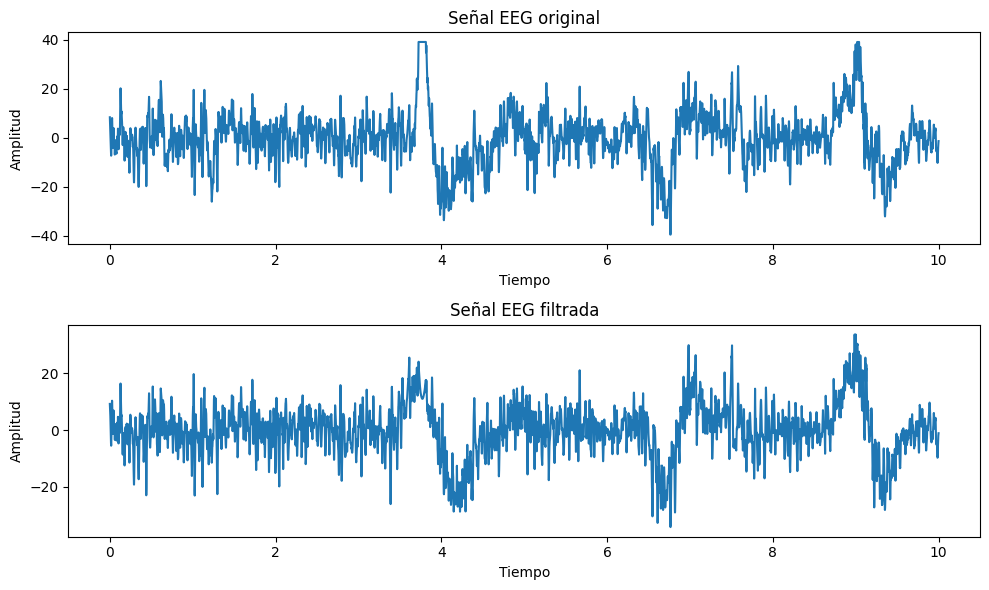

In [20]:
# Visualizar la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, eeg_signal)
plt.title('Señal EEG original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Señal EEG filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

## EEG CICLO ABRIR Y CERRAR OJOS FFT

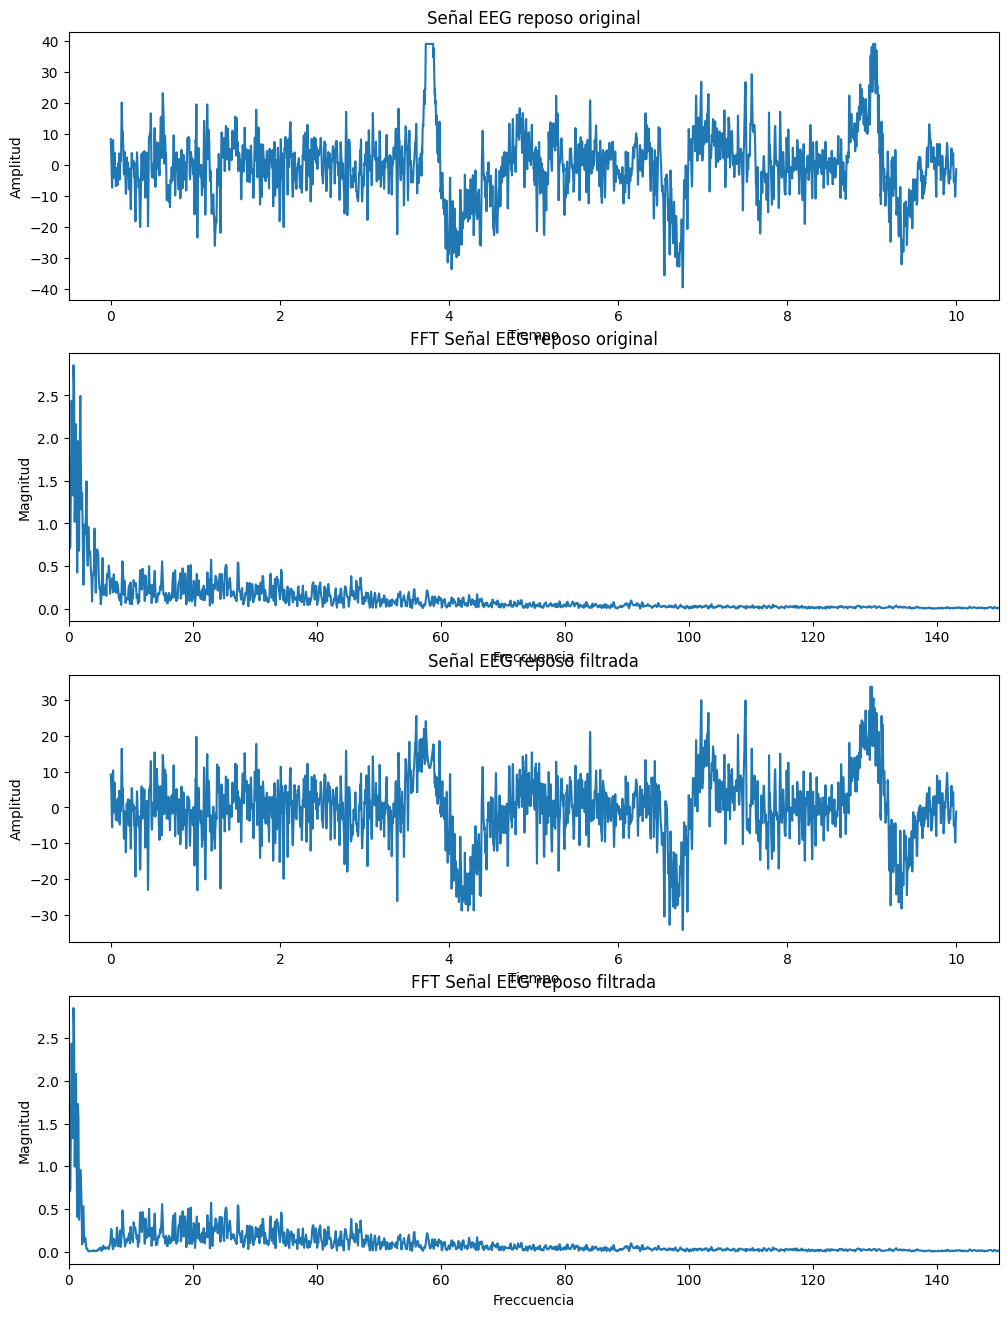

In [24]:
plt.figure(figsize=(12, 16))
plt.subplot(4, 1, 1)
plt.plot(t, eeg_signal)
plt.title('Señal EEG reposo original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 2)
plt.magnitude_spectrum(eeg_signal, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal EEG reposo original')
plt.xlabel('Freccuencia')
plt.ylabel('Magnitud')

plt.subplot(4, 1, 3)
plt.plot(t, filtered_signal)
plt.title('Señal EEG reposo filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 4)
plt.magnitude_spectrum(filtered_signal, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal EEG reposo filtrada')
plt.xlabel('Freccuencia')
plt.ylabel('Magnitud')
plt.show()

## EEG RESOLVIENDO PROBLEMAS MATEMÁTICOS


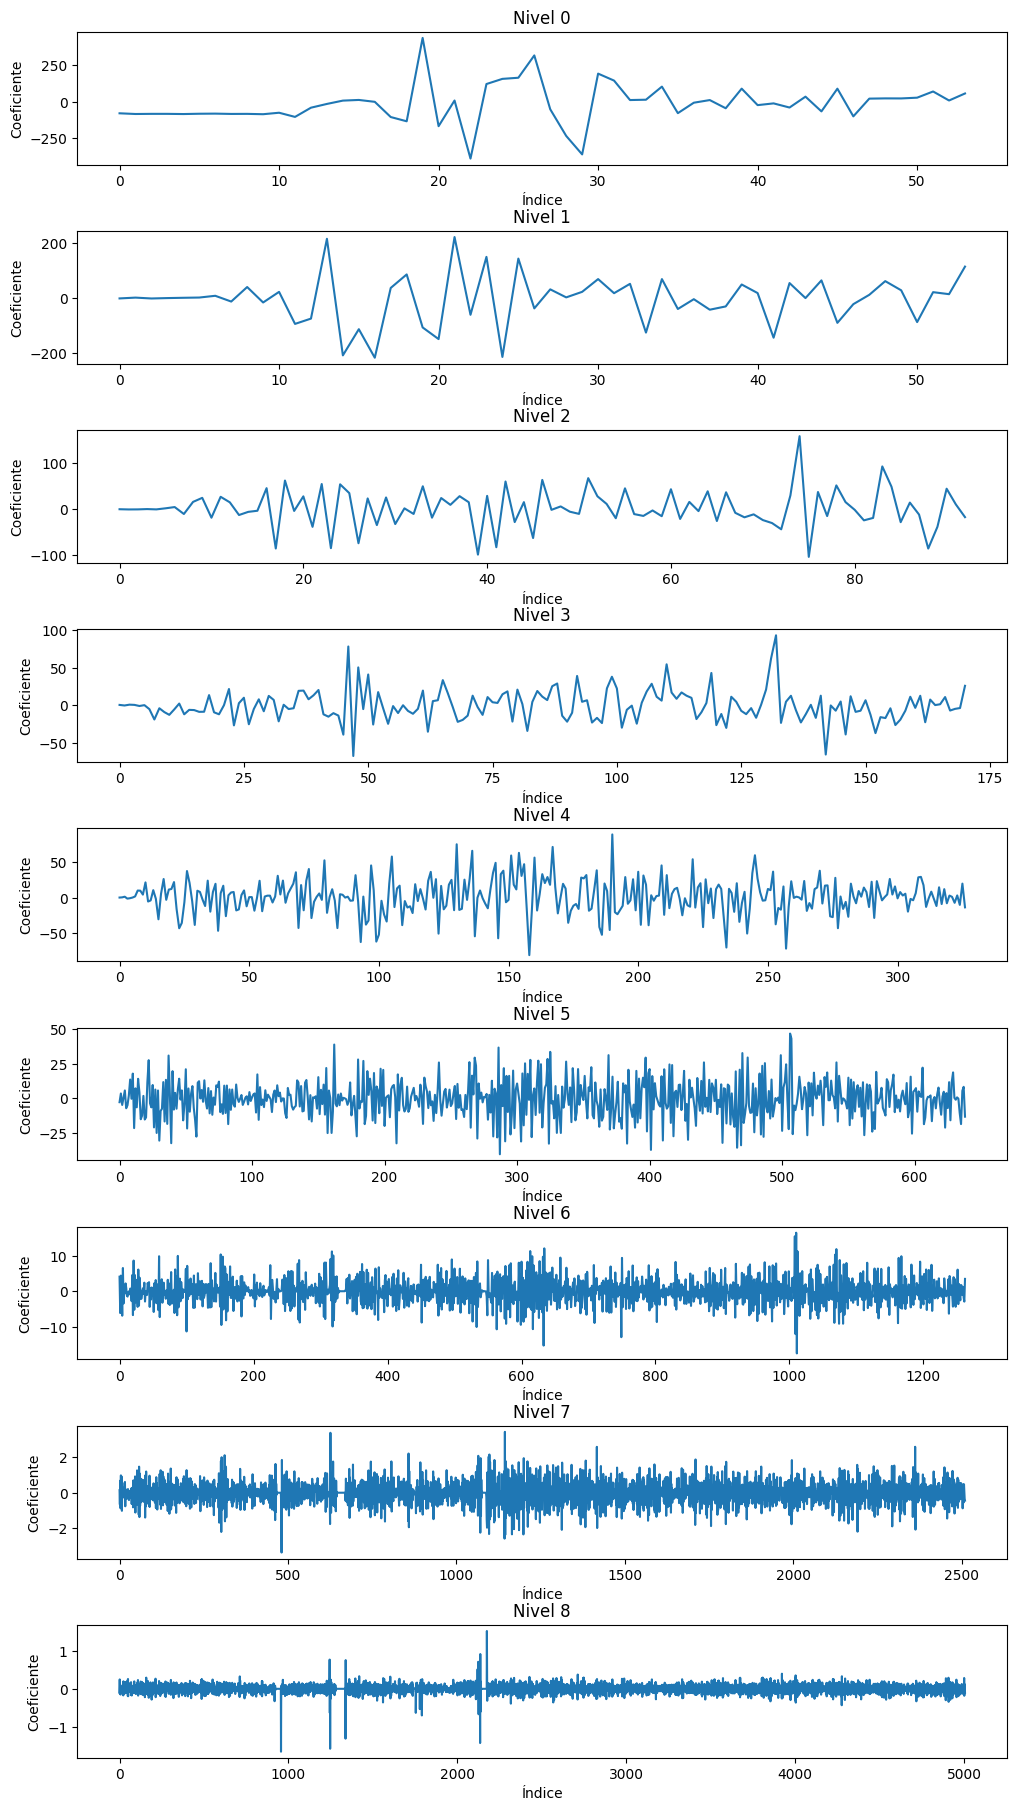

In [21]:
#-------PLOTEO DE LA SEÑAL 4
array = np.genfromtxt("/content/4 - EEG.txt",delimiter="	",skip_header = 2) #leemos el archivo txt

M = array[:,-2].shape[0] #longitud de la señal
valores=array[:,-2]

cantidad=np.size(valores);
#Siendo la frecuencia de muestreo del BITalino de 1000 Hz

tiempo=np.arange(0,cantidad)
tiempo=tiempo/1000

valores=(((valores/1024)-0.5)*3.3)/(41782)
valores=valores*1000000

valores=valores[0:10000]
tiempo=tiempo[0:10000]

# HACEMOS EL FILTRADO CON WAVELET
fs = 1000  # Frecuencia de muestreo
t = tiempo
eeg_signal = valores

# Aplicar la transformada wavelet discreta (DWT) a la señal EEG
coeffs = pywt.wavedec(eeg_signal, 'db8', level=8)

# Visualizar todos los niveles de la wavelet
plt.figure(figsize=(12, 25))
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs) + 1, 1, i + 1)
    plt.plot(coeff)
    plt.title(f'Nivel {i}')
    plt.xlabel('Índice')
    plt.ylabel('Coeficiente')

plt.subplots_adjust(hspace=0.5)

# Filtrar los coeficientes eliminando los detalles no deseados
for i in range(1, 3):  # Eliminar los detalles en los niveles D1 y D2
    coeffs[i] *= 0

# Eliminar la madre wavelet A8 correspondiente al rango de frecuencia de 0 a 0.5 Hz
coeffs[8] *= 0

# Reconstruir la señal filtrada
filtered_signal = pywt.waverec(coeffs, 'db8')

plt.show()


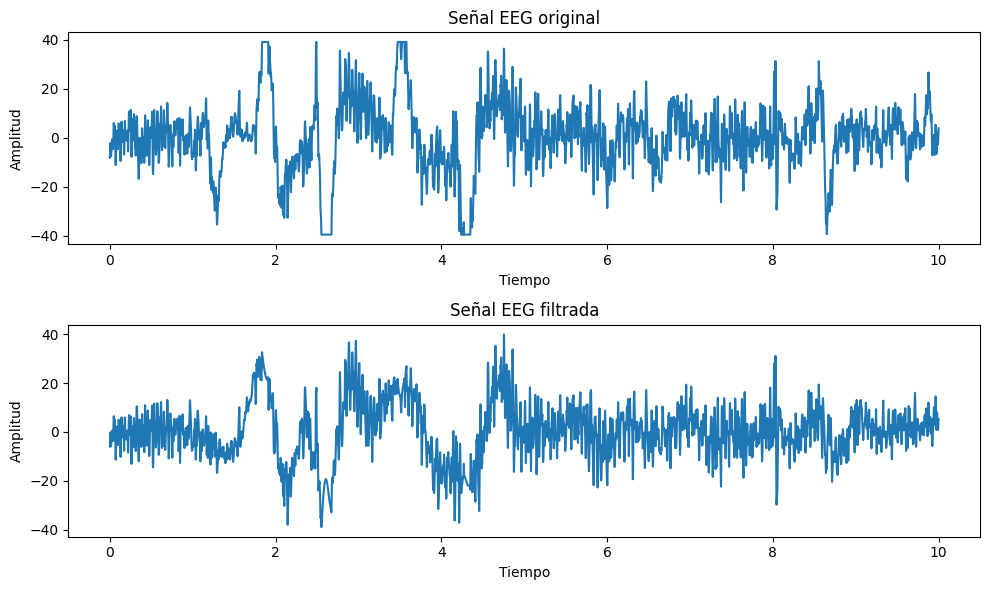

In [22]:
# Visualizar la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, eeg_signal)
plt.title('Señal EEG original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Señal EEG filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

## EEG RESOLVIENDO PROBLEMAS MATEMÁTICOS FFT

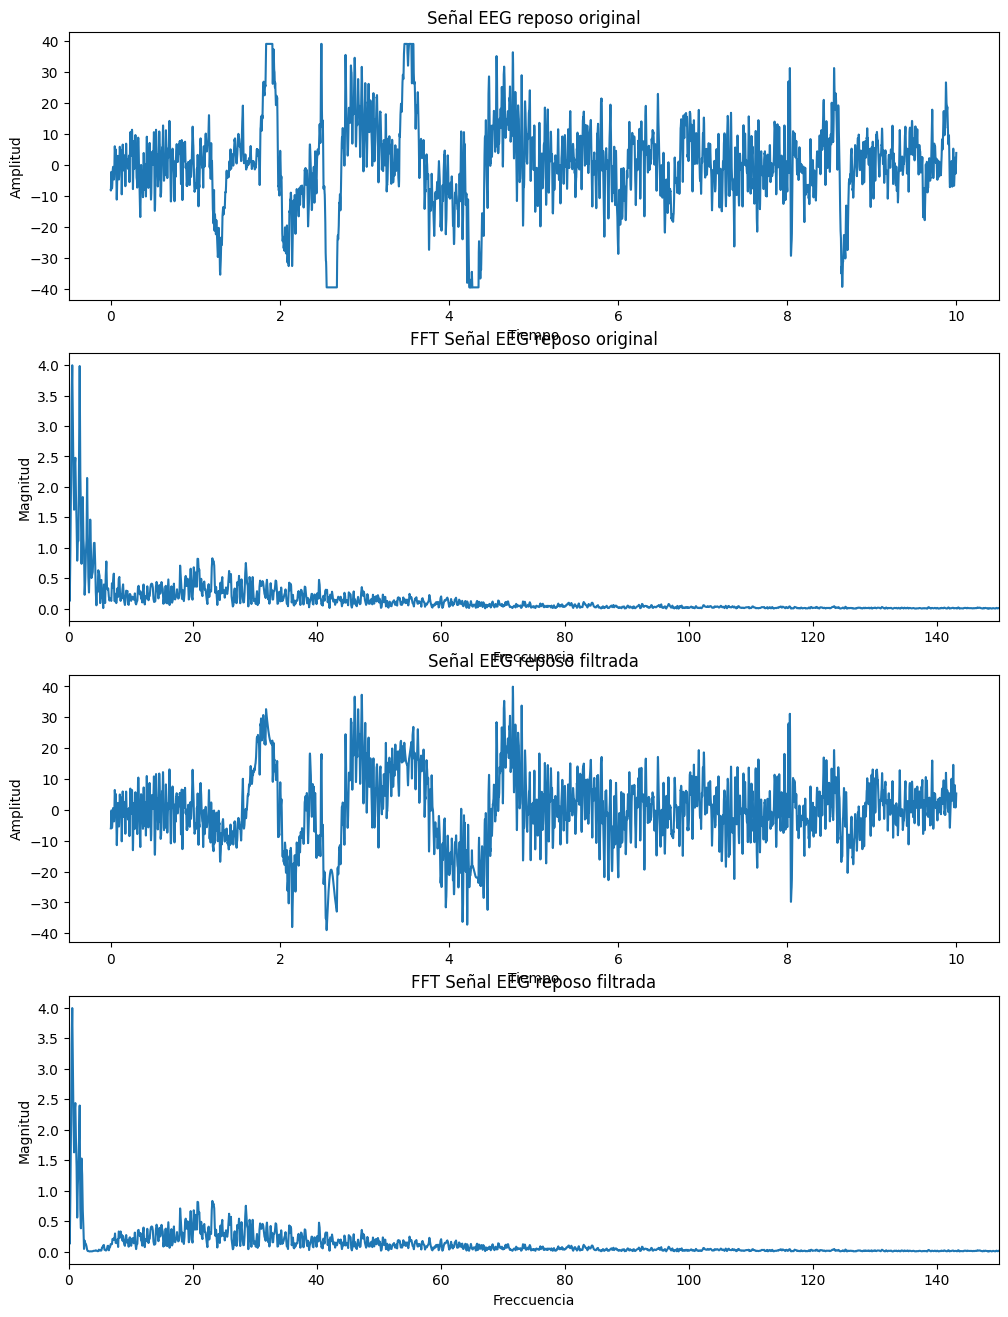

In [26]:
plt.figure(figsize=(12, 16))
plt.subplot(4, 1, 1)
plt.plot(t, eeg_signal)
plt.title('Señal EEG reposo original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 2)
plt.magnitude_spectrum(eeg_signal, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal EEG reposo original')
plt.xlabel('Freccuencia')
plt.ylabel('Magnitud')

plt.subplot(4, 1, 3)
plt.plot(t, filtered_signal)
plt.title('Señal EEG reposo filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 4)
plt.magnitude_spectrum(filtered_signal, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal EEG reposo filtrada')
plt.xlabel('Freccuencia')
plt.ylabel('Magnitud')
plt.show()